## Pre-calculations with tilted lenses

created: **17/08/2022**; last edited: **28/08/2022**

[rafael.celestre@esrf.eu](mailto:rafael.celestre@esrf.eu)

<hr style="border:1px solid gray">

In [1]:
# imports

# checking we are using the correct python:
import sys
print(sys.executable)
print(sys.version)
sys.path.insert(0, '../../pylibs/')

%matplotlib notebook
# %matplotlib widget

import matplotlib.pylab as pl

from f_index_of_refraction import index_of_refraction

import barc4plots.barc4plots as b4pt         # get barc4plots: https://gitlab.esrf.fr/celestre/barc4plots
import numpy as np  

/home/esrf/celestre/miniconda/envs/xog/bin/python
3.8.12 (default, Oct 12 2021, 13:49:34) 
[GCC 7.5.0]


In [2]:
# x-ray lens parameters in meters

beamE = 11.103    # in keV
pix_size = 0.635  # in um
mat = 'Be'
delta, beta, att_len = index_of_refraction(mat, beamE*1e3)
dpi = 250   # for plots
print('>>> %s: n = 1 - %.6e + i %.6e (att. length %.6e) at %.3f keV'%(mat, delta, beta, att_len, beamE))

>>> Be: n = 1 - 2.763751e-06 + i 7.234737e-10 (att. length 1.228269e-02) at 11.103 keV


### Simple model using thin lens approximation and basic CRL equations

In this model, we define the optical power for a single bi-concave lens as: $F=f^{-1}=\cfrac{2\delta}{R}$. We can add several lenses in close contact, that is, neglecting the space between them, by $F_{\text{lenses}}=\sum F_i$.

If we consider a CRL stack of N lenses of radius $R_1$ such that $F_1=\cfrac{m_1\delta_1\cdot N}{R_1}$ and a supplementary lens for fine tunning the stack $F_2=\cfrac{m_2\delta_2}{R_2}$, where $m$ is the number of refractive surfaces (2 for bi-concave lenses, 1 otehrwise). The ensemble will have focal the length given by: $f_{\text{lenses}}=\cfrac{R_1R_2}{m_2\delta_2R_1 + m_1 \delta_1  N R_2}$.

If the fine-tuning lens is implemented by tilting a 1D lens perpendicular to the focusing direction by a angle $\theta$, the effective radius is given by $R_{\text{eff}}=R_2 \cos{(\theta)}$.

We have, then:  $f_{\text{lenses}}=\cfrac{R_1R_2 \cos{(\theta)} }{m_2\delta_2R_1 + m_1 \delta_1 N R_2 \cos{(\theta)}}$. If we use the same lens type for fine-tunning, that is, $R_1=R_2=R$, $\delta_1=\delta_2=\delta$ and $m_1=m_2=m$: 

$>> f_{\text{lenses}}=\cfrac{1}{m\delta}\cfrac{R \cos{(\theta)} }{1 + N \cos{(\theta)}}$



In [3]:
def f_lenses(N, R1, delta1, R2, delta2, theta, isdeg=False):
    if isdeg:
        angle = theta*np.pi/180  
    else:
        angle = theta
    return (R1*R2*np.cos(angle))/(2*delta2*R1 + 2*N*delta1*R2*np.cos(angle))

#### Example 1: 1D Be (R=100 $\mu$m) lens stack with N = 13 and an extra 1D Be lenses for fine tuning of the focal length.


>>>> file precalculations.png saved to disk.


<IPython.core.display.Javascript object>


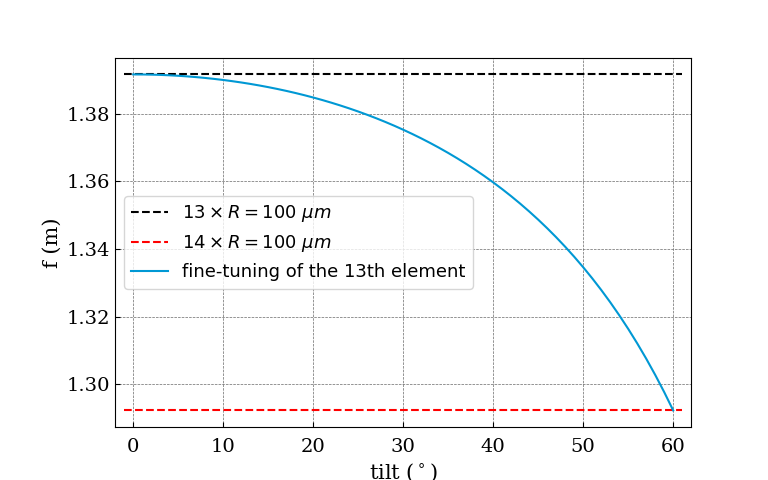

In [4]:
N = 13
R = 100e-6
theta = np.linspace(0, 60, 61)

f_N = f_lenses(N, R, delta, 1e23, delta, 0, isdeg=True)
f_N1 = f_lenses(N+1, R, delta, 1e23, delta, 0, isdeg=True)
f_scan = f_lenses(N-1, R, delta, R, delta, theta, isdeg=True)

image = b4pt.Image2Plot(np.asarray([f_N, f_N]), np.asarray([-1, 61]))
image.AspectRatio = False
image.LaTex = True
image.ax_limits = [-1, 61, None, None]
image.grid = True
image.LineStyle = '--'
image.label = '$%s \\times R=%s~\mu m$'%(str(N), str(int(R*1e6)))
image.ColorScheme = -1
image.sort_class()
b4pt.plot_1D(image, Enable=False, Hold=False)
image = b4pt.Image2Plot(np.asarray([f_N1, f_N1]),  np.asarray([-1, 61]))
image.LineStyle = '--'
image.label = '$%s \\times R=%s~\mu m$'%(str(N+1), str(int(R*1e6)))
image.ColorScheme = -2
image.sort_class()
b4pt.plot_1D(image, Enable=False, Hold=True)

image = b4pt.Image2Plot(f_scan, theta)
image.LineStyle = '-'
image.label = 'fine-tuning of the %sth element'%str(N)
image.ColorScheme = 4
image.sort_class()
image.legends = ['', 'tilt ($^\circ$)', 'f (m)']
image.ax_limits = [-2, 62, None, None]
image.LabelPos = 0
image.sort_class()
b4pt.plot_1D(image,'./precalculations.png', Enable=True, Hold=True, dpi=dpi)
